In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')
%matplotlib inline

In [2]:
df = pd.read_csv('/home/jithendra/work/exp/sentiment_analysis_eminem_lyrics/lyrics/lyrics.csv')
df.head()

,Song,Lyrics
0,Killshot,"You sound like a bitch, bitch Shut the fuck up..."
1,The-Adventures-of-Moon-Man-Slim-Shady-Eminem,"Yep (Aww) Yep (Mmm-aww), uh-huh Yeah, nigga Ye..."
2,Legacy,"Tell me where to go, tell me what to do I'll b..."
3,No-Love,"Love, love Love, love, love Don't hurt me Don'..."
4,Just-Lose-It,"Down, down, down! Okay Guess who's back? Back ..."


In [3]:
df.loc[0, 'Lyrics']

'You sound like a bitch, bitch Shut the fuck up! When your fans become your haters You done? Fuckin\' beard\'s weird Alright You yellin\' at the mic, fuckin\' weird beard We doin\' this once (You yellin\' at the mic, your beard\'s weird) Why you yell at the mic? (Illa) Rihanna just hit me on a text Last night I left hickeys on her neck Wait, you just dissed me? I\'m perplexed Insult me in a line, compliment me on the next Damn, I\'m really sorry you want me to have a heart attack Was watchin\' 8 Mile on my NordicTrack Realized I forgot to call you back Here\'s that autograph for your daughter I wrote it on a Starter cap Stan, Stan, son Listen, man, Dad isn\'t mad But how you gonna name yourself After a damn gun and have a man-bun? The giant\'s woke, eyes open, undeniable Supplyin\' smoke, got the fire stoked Say you got me in a scope, but you grazed me I say one call to Interscope and you\'re Swayze Your reply got the crowd yelling, woo! So before you die let\'s see who can out-petty w

In [4]:
df['characters'] = df.Lyrics.str.len()
df['words'] = df.Lyrics.str.split().str.len()
df['unique_words'] = df.Lyrics.apply(lambda x: len(set (x.split())))                           

In [5]:
df.head()

,Song,Lyrics,characters,words,unique_words
0,Killshot,"You sound like a bitch, bitch Shut the fuck up...",5165,1003,543
1,The-Adventures-of-Moon-Man-Slim-Shady-Eminem,"Yep (Aww) Yep (Mmm-aww), uh-huh Yeah, nigga Ye...",5235,1012,558
2,Legacy,"Tell me where to go, tell me what to do I'll b...",3672,724,371
3,No-Love,"Love, love Love, love, love Don't hurt me Don'...",4195,837,396
4,Just-Lose-It,"Down, down, down! Okay Guess who's back? Back ...",2866,575,313


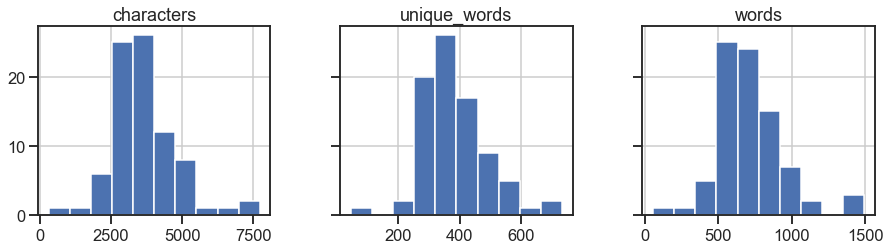

In [6]:
df.hist(sharey=True, layout=(2, 3), figsize=(15, 8));

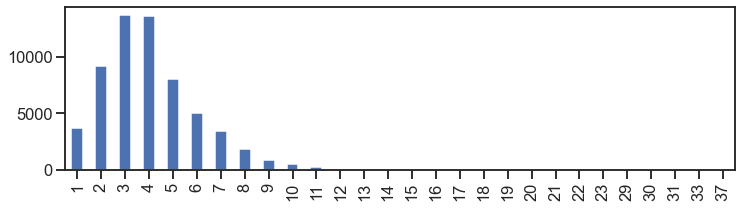

In [7]:
pd.Series(len(x) for x in ' '.join(df.Lyrics).split()).value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

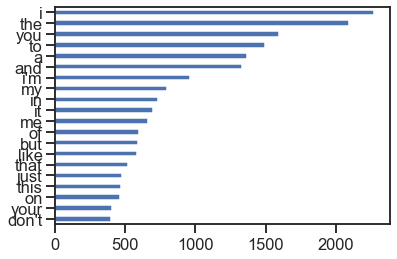

In [8]:
pd.Series(' '.join(df.Lyrics).lower().split()).value_counts()[:20][::-1].plot(kind='barh')

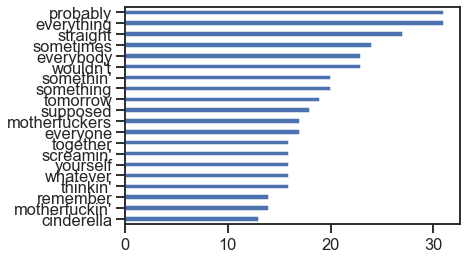

In [9]:
pd.Series([w for w in ' '.join(df.Lyrics).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

In [10]:
from nltk import ngrams

In [11]:
def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]


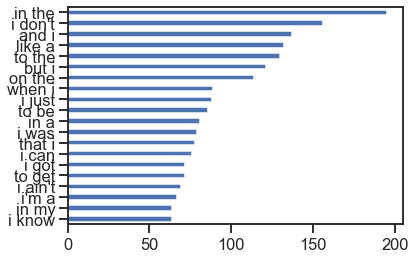

In [12]:
pd.Series(get_ngrams_from_series(df.Lyrics, 2)).value_counts()[:20][::-1].plot(kind='barh')

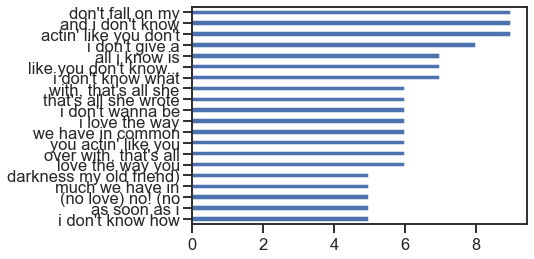

In [13]:
pd.Series(get_ngrams_from_series(df.Lyrics, 4)).value_counts()[:20][::-1].plot(kind='barh')

In [14]:
#Machine generated lyrics using Markov
import re
import random
from collections import defaultdict


class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_song(self, lines=10, length=8, length_range=None, startswith=None):
        song = []
        if startswith:
            song.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            song.append(self.gen_sentence(length=sent_len))
        return '\n'.join(song)

In [19]:
gen = MarkovRachaita(corpus=' '.join(df.Lyrics))
gen.gen_song(lines=10, length_range=[5, 10])

"what if he's right i'm just too big and here go my\nyou got a trailer full of syrup\nmove give me a doctor i need to leave the\nthat he put the heel of your stereo here we\nup she mistook me for some nookie\ngrass and fall on my teeth while he's all over\nlet you go marry someone else wrote used to get ya you're\nbut i rap or up in this world this world\nhad a time warp from though and\nfuckers just keep droppin' shit you said if i stay"

In [20]:
gen.gen_song(lines=10, length_range=[5, 10], startswith='kanye')

"is kanye when you refer to the kids who don't\nparking lot fellow set fire to dig deep nobody\nband you gotta open your eyes deep inside of my skin\nthat as a writer might've fell off they'll\nyou come at me the shit i ain't\nbasement haha feminist women love eminem chicka chicka chicka chicka\nfuck with shady 'cause why 'cause shady will fuckin'\nto show ya the semi'll pop nigga we made it it's\nstopping it they say love the game on the mic\nme fuck you self esteem must be"

In [17]:
gen.gen_song(lines=10, length_range=[5, 10], startswith='taylor')

"to taylor swift and that iggy hoe you better go\nweather cold or warm just lettin' you know you got no money\ni never in cuffs so who do you trust they just metaphors\nthere and show em where the rest of the motherfucking chick\nto the wall pencil drawn this is music\nand will be home soon and to think\nto see who they came to a subject\nand kiss her tell her i miss her hailie\nit's like these are things that i love's killing\nbut i'm your closest pal the posterchild the motherfucking spokesman now for"

In [18]:
gen.gen_song(lines=10, length_range=[5, 10], startswith='kim')

"fuck kim in my therapy chair my dick hah but\nrather have me too don't try to make you\nin a circle but i'm feelin' a little crazy pretty baby but\nthis probably twisted my wife wears red but looks better without the\nto take a loss and have people rub it in\nhalsey your red sweater your black leather you\ntit i don't care yeah wasted youth always on my\nhis lady and even the devil he wants to go in\nferrari spider move like c breezy i\nhere fuck tomorrow 'cause moments like these are to die"